### Ignore neighboring regions

In [198]:
%load_ext autoreload
%autoreload complete

In [30]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(17712, 46)


/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_4763/2080112829.py:5: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")


In [35]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate_and_protest'")
df_ = df_.groupby(
    ["ignore_neighbor_regions", "ignore_bw", "hash"], group_keys=True
).apply(lambda x: x.sort_values(["rrmse"]).head(1))
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape

(0008ae64337cb59801bcb4aeb5b01118    4
 aad1eb62b2e321b0794f765c02c80b27    4
 abe9d05b64d1a07469fd64d2f6078315    4
 abbaddf7f3897f7648c425256d798062    4
 abb727096e8014a561a1cfea8e4d821f    4
                                    ..
 55834b0e67919ae0ffe1ee72abd57245    4
 553de2f37bc7206e098d58d36d8fb0ba    4
 550797ed1e84c124d466cd0011a5415f    4
 54a50fc055d794880c3c6c41f8abef83    4
 ffefd81c770862db89f165d8131cc81e    4
 Name: hash, Length: 1476, dtype: int64,
 lasso    5904
 Name: method, dtype: int64,
 (5904, 46))

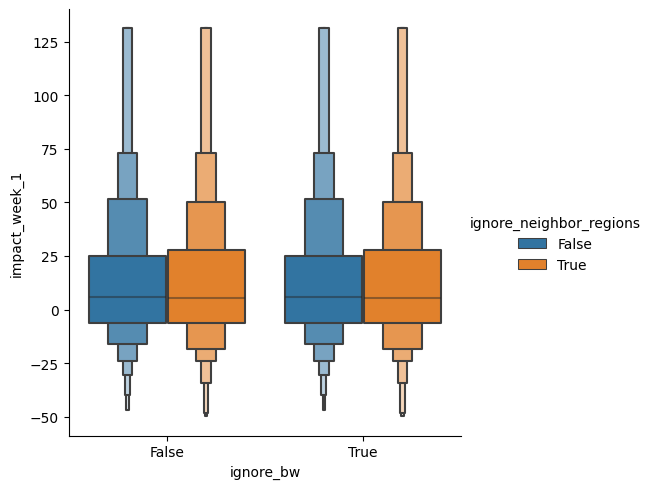

In [36]:
import seaborn as sns

sns.catplot(
    data=df_,
    x="ignore_bw",
    hue="ignore_neighbor_regions",
    y="impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

## Protest-free days

In [54]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(2119, 46)


In [55]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate'")

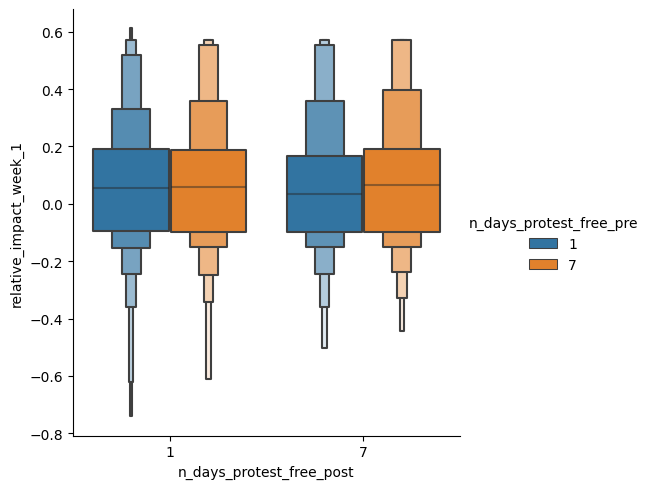

In [59]:
import seaborn as sns

sns.catplot(
    data=df_,
    hue="n_days_protest_free_pre",
    x="n_days_protest_free_post",
    y="relative_impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

In [53]:
print(
    df.query("n_days_protest_free_pre == 1 and n_days_protest_free_post == 1").shape[0]
)
print(
    df.query("n_days_protest_free_pre == 1 and n_days_protest_free_post == 7").shape[0]
)
print(
    df.query("n_days_protest_free_pre == 7 and n_days_protest_free_post == 1").shape[0]
)
print(
    df.query("n_days_protest_free_pre == 7 and n_days_protest_free_post == 7").shape[0]
)

66
45
42
44


<Axes: xlabel='rrmse', ylabel='relative_impact_week_1'>

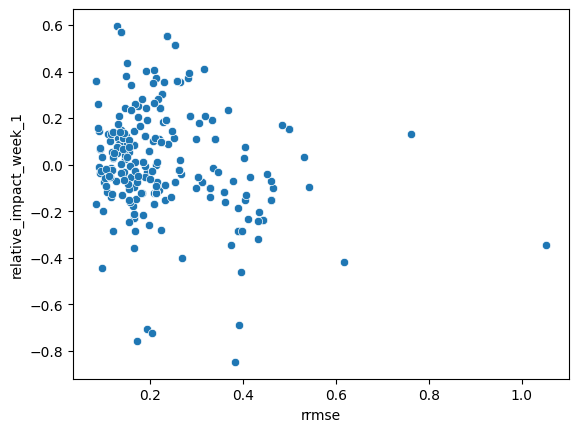

In [67]:
sns.scatterplot(
    data=df.query("n_days_protest_free_pre == 7 and n_days_protest_free_post == 7"),
    x="rrmse",
    y="relative_impact_week_1",
)

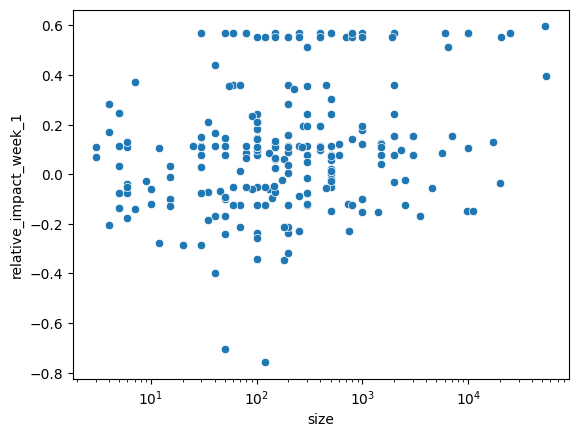

In [66]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df.query("n_days_protest_free_pre == 7 and n_days_protest_free_post == 7"),
    x="size",
    y="relative_impact_week_1",
)
plt.xscale("log")

### Aggregate

In [58]:
from protest_impact.data.protests import get_climate_protests

protests = get_climate_protests(groups=["fff", "alg", "xr", "eg"])
protests.head()

,event_date,sub_event_type,assoc_actor_1,admin1,location,notes,weekday,region_code,size
386,2022-12-22,Protest with intervention,ALG: Uprising of the Last Generation (Germany),Berlin,Berlin - Tempelhof-Schoneberg,"On 22 December 2022, 4 ALG activists demonstra...",Thursday,BE,4.0
387,2022-12-21,Peaceful protest,Extinction Rebellion,Hamburg,Hamburg,"On 21 December 2022, members of Extinction Reb...",Wednesday,HH,NaN
390,2022-12-21,Protest with intervention,ALG: Uprising of the Last Generation (Germany),Bayern,Munchen,"On 21 December 2022, at least 10 members of AL...",Wednesday,BY,10.0
394,2022-12-20,Protest with intervention,ALG: Uprising of the Last Generation (Germany),Berlin,Berlin - Charlottenburg-Wilmersdorf,"On 20 December 2022, 8 members of ALG demonstr...",Tuesday,BE,8.0
395,2022-12-20,Protest with intervention,ALG: Uprising of the Last Generation (Germany),Bayern,Munchen,"On 20 December 2022, at least 10 members of AL...",Tuesday,BY,10.0


In [59]:
len(protests), len(protests.event_date.unique())

(749, 297)

In [60]:
n_protests = protests.groupby(["admin1", "event_date"]).size()
n_protests.head()

admin1  event_date
Bayern  2020-01-10    5
        2020-01-13    2
        2020-01-16    1
        2020-01-18    1
        2020-01-24    1
dtype: int64

In [61]:
protest_size_sum = protests.groupby(["admin1", "event_date"]).sum()["size"]
protest_size_sum.head()

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_26675/2820060647.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  protest_size_sum = protests.groupby(["admin1", "event_date"]).sum()["size"]


admin1  event_date
Bayern  2020-01-10    550.0
        2020-01-13    150.0
        2020-01-16     12.0
        2020-01-18     25.0
        2020-01-24     50.0
Name: size, dtype: float64

In [62]:
largest_protest_size = protests.groupby(["admin1", "event_date"])["size"].max()
largest_protest_size.head()

admin1  event_date
Bayern  2020-01-10    500.0
        2020-01-13    150.0
        2020-01-16     12.0
        2020-01-18     25.0
        2020-01-24     50.0
Name: size, dtype: float64

In [63]:
has_mixed_groups = (
    protests.groupby(["admin1", "event_date"])["assoc_actor_1"].nunique() > 1
)
print(has_mixed_groups.value_counts())
has_mixed_groups.head()

False    467
True       9
Name: assoc_actor_1, dtype: int64


admin1  event_date
Bayern  2020-01-10    False
        2020-01-13    False
        2020-01-16    False
        2020-01-18    False
        2020-01-24    False
Name: assoc_actor_1, dtype: bool

In [64]:
largest_protests = protests.groupby(["admin1", "event_date"]).apply(
    lambda x: x.sort_values(["size"], ascending=False).head(1)
)
largest_protests.head()

event_date    sub_event_type  \
admin1 event_date                                      
Bayern 2020-01-10 14564 2020-01-10  Peaceful protest   
       2020-01-13 14523 2020-01-13  Peaceful protest   
       2020-01-16 14489 2020-01-16  Peaceful protest   
       2020-01-18 14438 2020-01-18  Peaceful protest   
       2020-01-24 14367 2020-01-24  Peaceful protest   

                                                       assoc_actor_1  admin1  \
admin1 event_date                                                              
Bayern 2020-01-10 14564  FFF: Fridays for Future; Students (Germany)  Bayern   
       2020-01-13 14523  FFF: Fridays for Future; Students (Germany)  Bayern   
       2020-01-16 14489                         Extinction Rebellion  Bayern   
       2020-01-18 14438  FFF: Fridays for Future; Students (Germany)  Bayern   
       2020-01-24 14367  FFF: Fridays for Future; Students (Germany)  Bayern   

                                          location  \
admin1 event_date                                    
Bayern 2020-01-10 14564                    Munchen   
       2020-01-13 14523                    Munchen   
       2020-01-16 14489                   Erlangen   
       2020-01-18 14438  Bad Neustadt an der Saale   
       2020-01-24 14367                   Bad Tolz   

                                                                     notes  \
admin1 event_date                                                            
Bayern 2020-01-10 14564  On 10 January 2020, about 500 FFF activists an...   
       2020-01-13 14523  On 13 January 2020, about 150 people, includin...   
       2020-01-16 14489  On 16 January 2020, between 10 and 15 Extincti...   
       2020-01-18 14438  On 18 January 2020, about 25 people, including...   
       2020-01-24 14367  On 24 January 2020, dozens of FFF activists an...   

                          weekday region_code   size  
admin1 event_date                                     
Bayern 2020-01-10 14564    Friday          BY  500.0  
       2020-01-13 14523    Monday          BY  150.0  
       2020-01-16 14489  Thursday          BY   12.0  
       2020-01-18 14438  Saturday          BY   25.0  
       2020-01-24 14367    Friday          BY   50.0

In [69]:
largest_protests["size"] = protest_size_sum
largest_protests["n_protests"] = n_protests
largest_protests["largest_protest_size"] = largest_protest_size
largest_protests["has_mixed_groups"] = has_mixed_groups
largest_protests = largest_protests.reset_index(drop=True)
largest_protests.head()

,event_date,sub_event_type,assoc_actor_1,admin1,location,notes,weekday,region_code,size,n_protests,largest_protest_size,has_mixed_groups
0,2020-01-10,Peaceful protest,FFF: Fridays for Future; Students (Germany),Bayern,Munchen,"On 10 January 2020, about 500 FFF activists an...",Friday,BY,NaN,NaN,NaN,NaN
1,2020-01-13,Peaceful protest,FFF: Fridays for Future; Students (Germany),Bayern,Munchen,"On 13 January 2020, about 150 people, includin...",Monday,BY,NaN,NaN,NaN,NaN
2,2020-01-16,Peaceful protest,Extinction Rebellion,Bayern,Erlangen,"On 16 January 2020, between 10 and 15 Extincti...",Thursday,BY,NaN,NaN,NaN,NaN
3,2020-01-18,Peaceful protest,FFF: Fridays for Future; Students (Germany),Bayern,Bad Neustadt an der Saale,"On 18 January 2020, about 25 people, including...",Saturday,BY,NaN,NaN,NaN,NaN
4,2020-01-24,Peaceful protest,FFF: Fridays for Future; Students (Germany),Bayern,Bad Tolz,"On 24 January 2020, dozens of FFF activists an...",Friday,BY,NaN,NaN,NaN,NaN


In [66]:
len(protests), len(largest_protests), len(
    largest_protests[["admin1", "event_date"]].drop_duplicates()
)

(749, 476, 476)

In [67]:
largest_protests["size"].describe()

count      476.000000
mean      1014.481092
std       5712.567568
min          0.000000
25%          0.000000
50%         22.000000
75%        150.000000
max      78960.000000
Name: size, dtype: float64

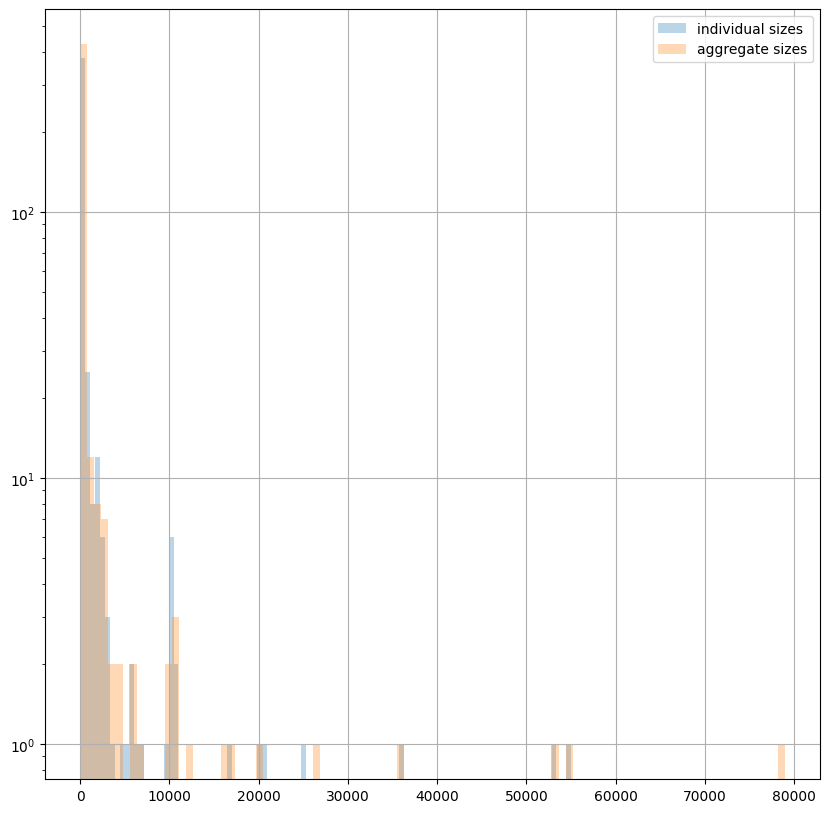

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
protests["size"].hist(bins=100, ax=ax, alpha=0.3, label="individual sizes")
largest_protests["size"].hist(bins=100, ax=ax, alpha=0.3, label="aggregate sizes")
ax.legend()
# ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

In [1]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(21165, 50)


In [6]:
df_ = df.copy()
df_ = df_.query(
    "discourse_type == 'climate' and n_days_protest_free_pre == 1 and n_days_protest_free_post == 1"
)
df_.query("aggregate_protests == True").shape, df_.query(
    "aggregate_protests == False"
).shape

((476, 50), (749, 50))

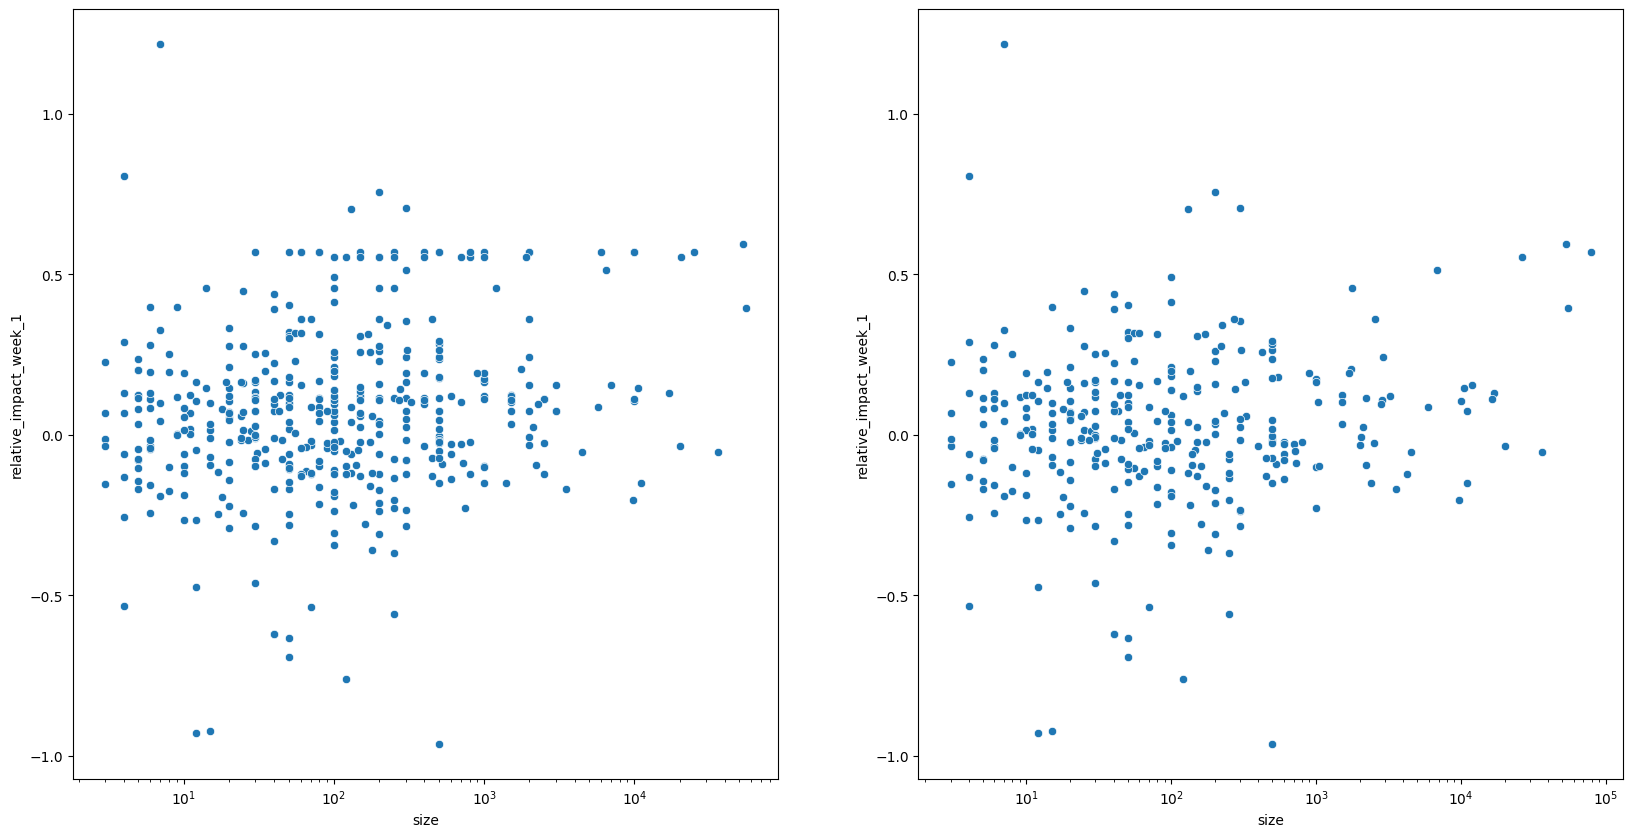

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(
    data=df_.query("aggregate_protests == False"),
    x="size",
    y="relative_impact_week_1",
    ax=axs[0],
)
sns.scatterplot(
    data=df_.query("aggregate_protests == True"),
    x="size",
    y="relative_impact_week_1",
    ax=axs[1],
)
axs[0].set_xscale("log")
axs[1].set_xscale("log")
plt.show()

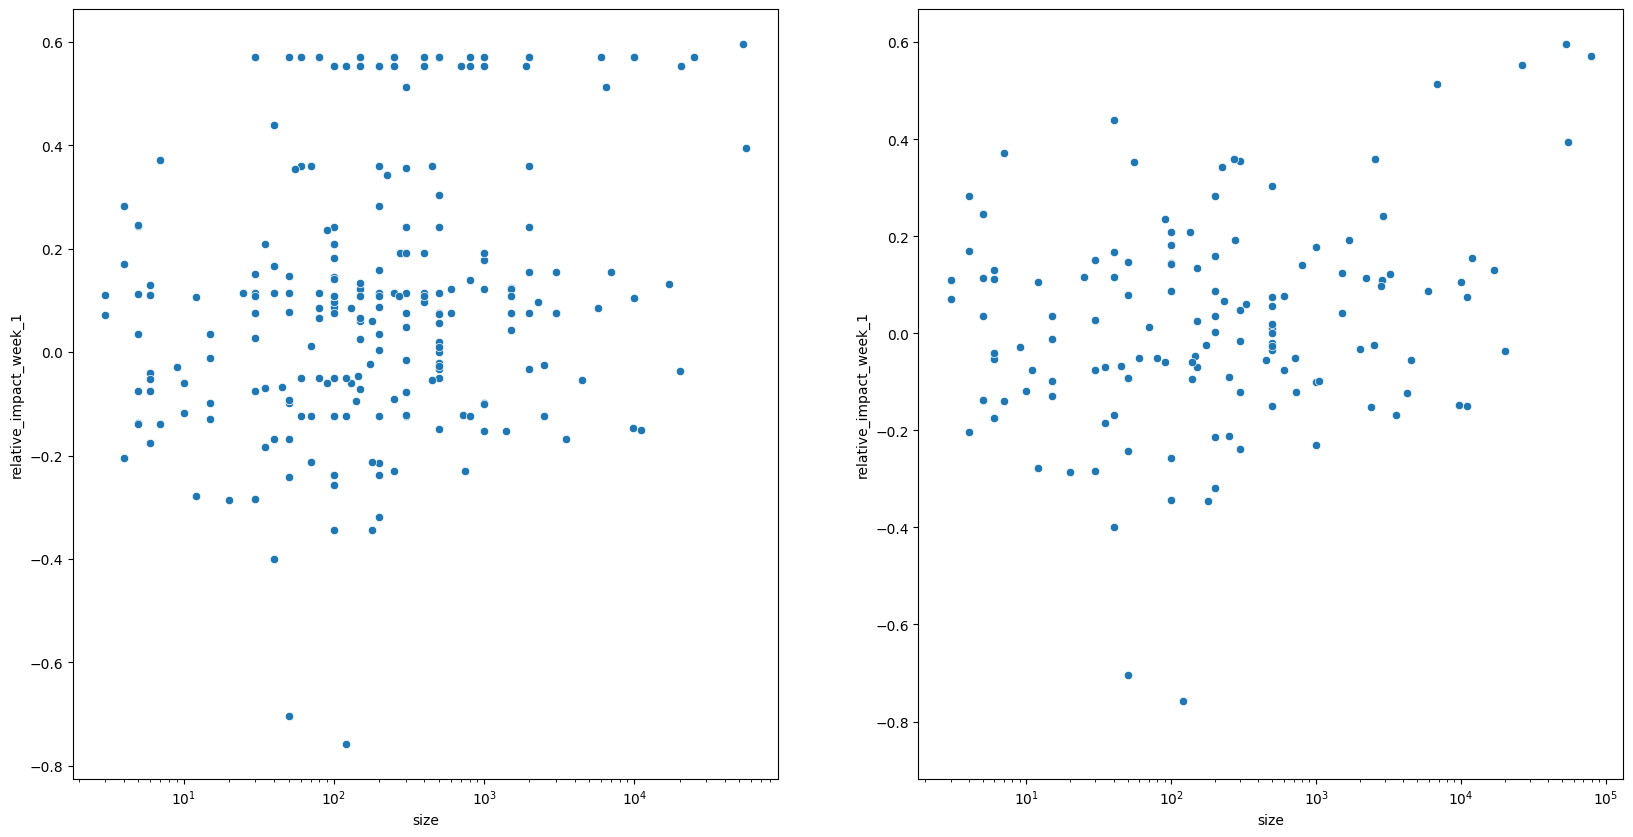

In [14]:
df_ = df.copy()
df_ = df_.query(
    "discourse_type == 'climate' and n_days_protest_free_pre == 7 and n_days_protest_free_post == 7"
)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(
    data=df_.query("aggregate_protests == False"),
    x="size",
    y="relative_impact_week_1",
    ax=axs[0],
)
sns.scatterplot(
    data=df_.query("aggregate_protests == True"),
    x="size",
    y="relative_impact_week_1",
    ax=axs[1],
)
axs[0].set_xscale("log")
axs[1].set_xscale("log")
plt.show()

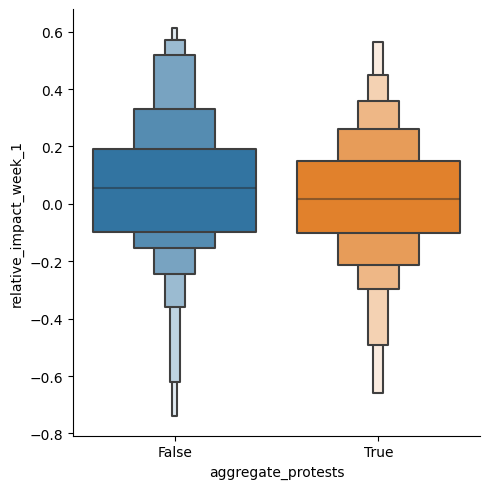

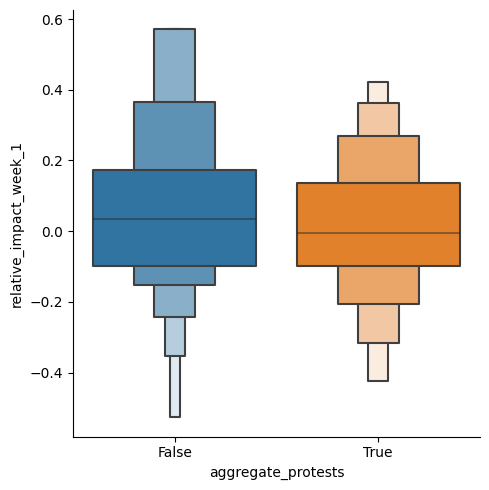

In [25]:
df_ = df.copy()
df_ = df_.query(
    "discourse_type == 'climate' and n_days_protest_free_pre == 1 and n_days_protest_free_post == 1"
)

sns.catplot(
    data=df_,
    x="aggregate_protests",
    y="relative_impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

df_ = df.copy()
df_ = df_.query(
    "discourse_type == 'climate' and n_days_protest_free_pre == 5 and n_days_protest_free_post == 5"
)

sns.catplot(
    data=df_,
    x="aggregate_protests",
    y="relative_impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

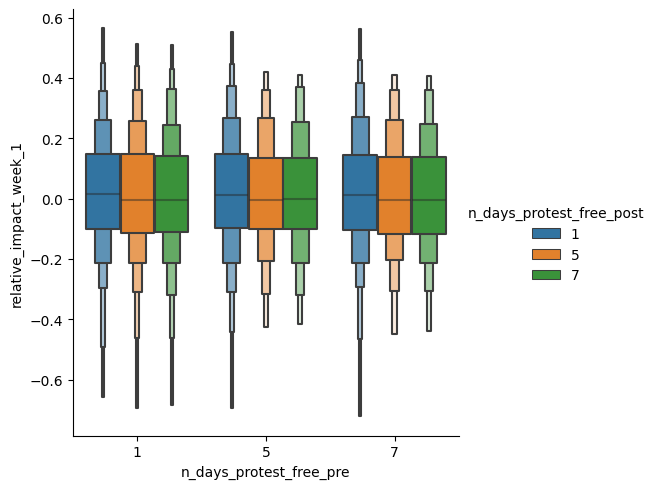

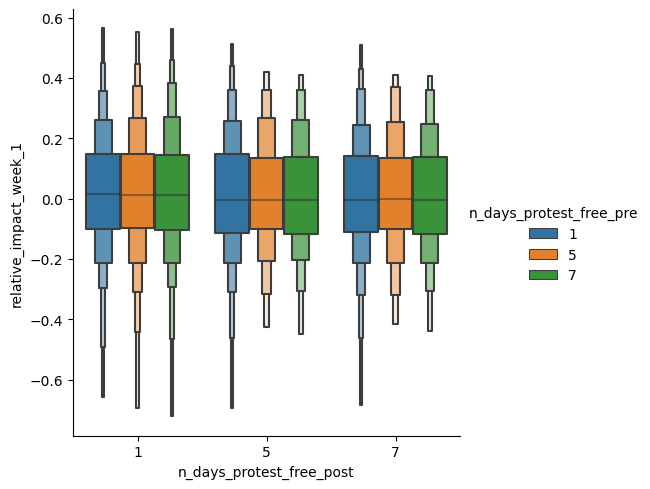

In [28]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate' and aggregate_protests == True")

sns.catplot(
    data=df_,
    x="n_days_protest_free_pre",
    hue="n_days_protest_free_post",
    y="relative_impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

sns.catplot(
    data=df_,
    x="n_days_protest_free_post",
    hue="n_days_protest_free_pre",
    y="relative_impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

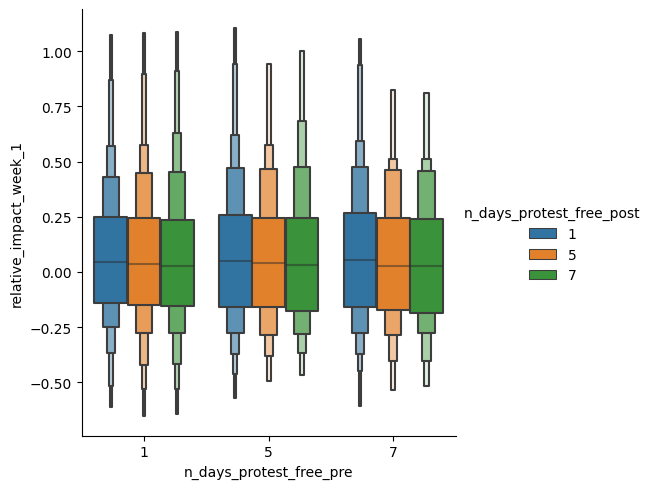

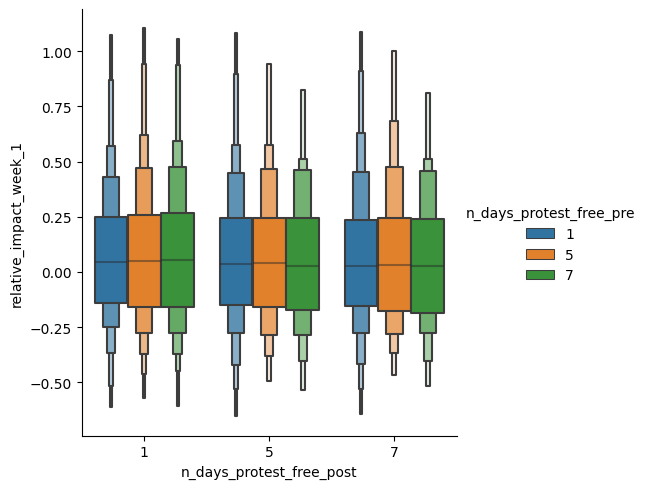

In [29]:
df_ = df.copy()
df_ = df_.query(
    "discourse_type == 'climate_and_protest' and aggregate_protests == True"
)

sns.catplot(
    data=df_,
    x="n_days_protest_free_pre",
    hue="n_days_protest_free_post",
    y="relative_impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

sns.catplot(
    data=df_,
    x="n_days_protest_free_post",
    hue="n_days_protest_free_pre",
    y="relative_impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

In [30]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(10209, 50)


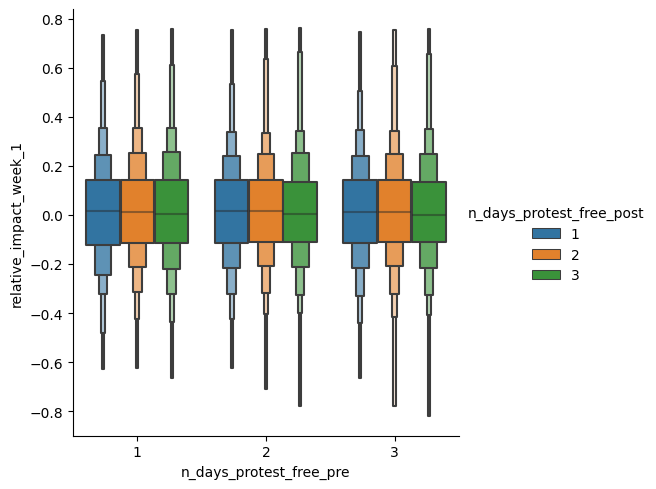

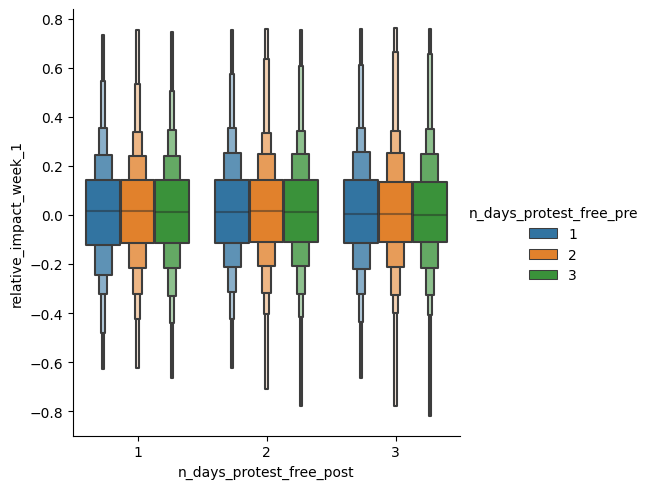

In [33]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate_not_protest'")

sns.catplot(
    data=df_,
    x="n_days_protest_free_pre",
    hue="n_days_protest_free_post",
    y="relative_impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

sns.catplot(
    data=df_,
    x="n_days_protest_free_post",
    hue="n_days_protest_free_pre",
    y="relative_impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

In [34]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(5712, 50)


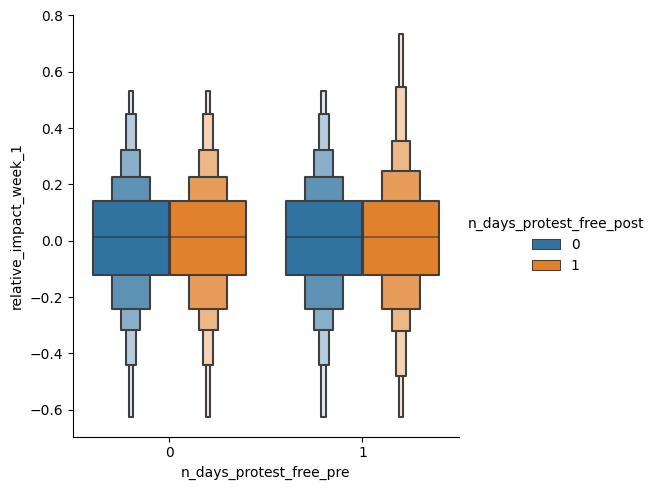

In [35]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate_not_protest'")

sns.catplot(
    data=df_,
    x="n_days_protest_free_pre",
    hue="n_days_protest_free_post",
    y="relative_impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

In [36]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(22848, 51)


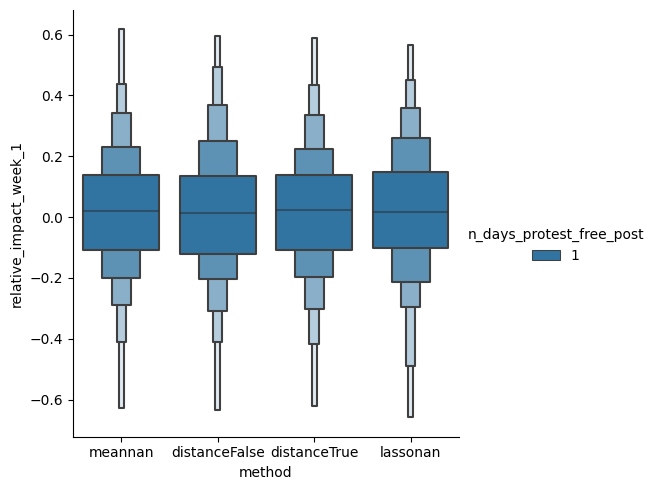

In [38]:
df_ = df.copy()
df_["method"] = df["method"] + df["distance__inverse"].astype(str)
df_ = df_.query(
    "discourse_type == 'climate' and n_days_protest_free_pre == 1 and n_days_protest_free_post == 1"
)

sns.catplot(
    data=df_,
    x="method",
    hue="n_days_protest_free_post",
    y="relative_impact_week_1",
    # y="n_theoretical_control_regions",
    kind="boxen",
    showfliers=False,
)

In [32]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(5712, 107)


In [36]:
for c in df.columns:
    print(c)

method
ignore_neighbor_regions
ignore_bw
agg_weekly
normalize
training_interval
start_date
end_date
protest_groups
source
discourse_type
prediction_interval
n_days_protest_free_pre
n_days_protest_free_post
aggregate_protests
event_date
sub_event_type
assoc_actor_1
admin1
location
notes
weekday
region_code
size
n_protests
largest_protest_size
has_mixed_groups
df
seed
n_theoretical_control_regions
method_group
impact_week_1
relative_impact_week_1
impact_week_2
relative_impact_week_2
impact_week_3
relative_impact_week_3
impact_week_4
relative_impact_week_4
impact_day_-13
relative_impact_day_-13
impact_day_-12
relative_impact_day_-12
impact_day_-11
relative_impact_day_-11
impact_day_-10
relative_impact_day_-10
impact_day_-9
relative_impact_day_-9
impact_day_-8
relative_impact_day_-8
impact_day_-7
relative_impact_day_-7
impact_day_-6
relative_impact_day_-6
impact_day_-5
relative_impact_day_-5
impact_day_-4
relative_impact_day_-4
impact_day_-3
relative_impact_day_-3
impact_day_-2
relative_im

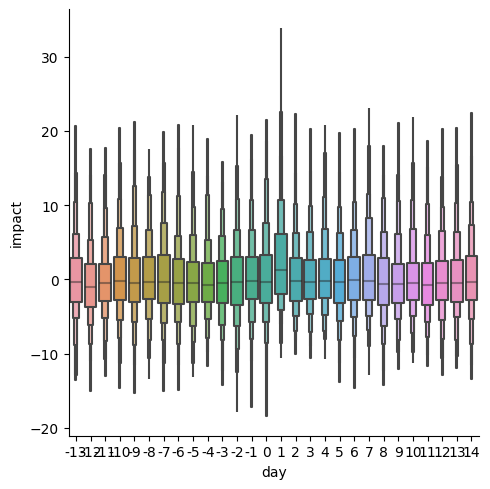

In [37]:
import seaborn as sns

df_ = df.copy()
df_["method"] = df["method"] + df["distance__inverse"].astype(str)
df_ = df_.query("discourse_type == 'climate_and_protest'")
# pivotize impact_day_1, ..., impact_day_7
df_ = df_.melt(
    id_vars=[
        "method",
    ],
    value_vars=[f"impact_day_{str(i+1)}" for i in range(-14, 14)],
    var_name="day",
    value_name="impact",
)
df_["day"] = df_["day"].str.replace("impact_day_", "").astype(int)
df_ = df_.query("method == 'lassonan'")

sns.catplot(
    data=df_,
    x="day",
    y="impact",
    kind="boxen",
    showfliers=False,
)

(<Figure size 500x200 with 1 Axes>,
 <Axes: xlabel='Days after protest', ylabel='Impact'>)

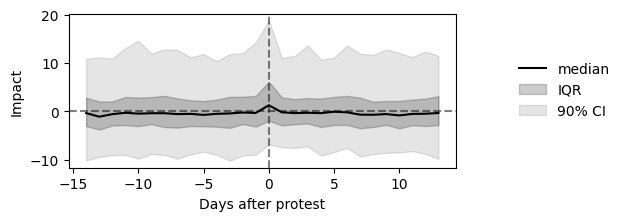

In [72]:
# qunatile time series plot

import matplotlib.pyplot as plt
import numpy as np


def plot_quantile_ts_(df_):
    fig, ax = plt.subplots(figsize=(5, 2))
    ax.plot(
        np.arange(-14, 14),
        df_.groupby("day")["impact"].quantile(0.5),
        color="black",
        label="median",
    )
    ax.fill_between(
        np.arange(-14, 14),
        df_.groupby("day")["impact"].quantile(0.25),
        df_.groupby("day")["impact"].quantile(0.75),
        color="black",
        alpha=0.2,
        label="IQR",
    )
    ax.fill_between(
        np.arange(-14, 14),
        df_.groupby("day")["impact"].quantile(0.05),
        df_.groupby("day")["impact"].quantile(0.95),
        color="black",
        alpha=0.1,
        label="90% CI",
    )
    ax.axhline(0, color="black", linestyle="--", alpha=0.5)
    ax.axvline(0, color="black", linestyle="--", alpha=0.5)
    ax.set_xlabel("Days after protest")
    ax.set_ylabel("Impact")
    # legend outside
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        frameon=False,
    )
    return fig, ax


plot_quantile_ts_(df_)

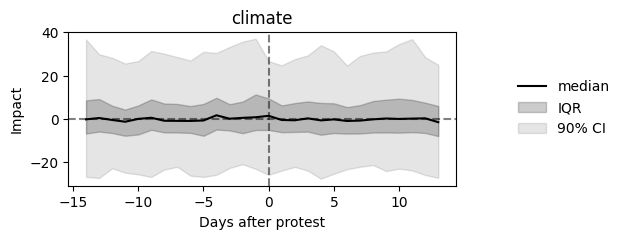

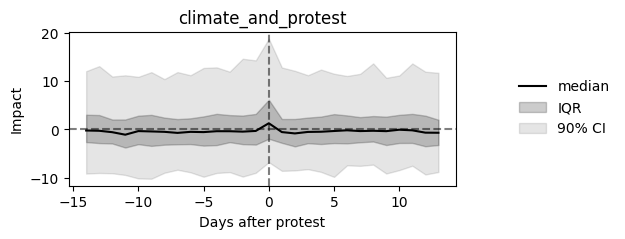

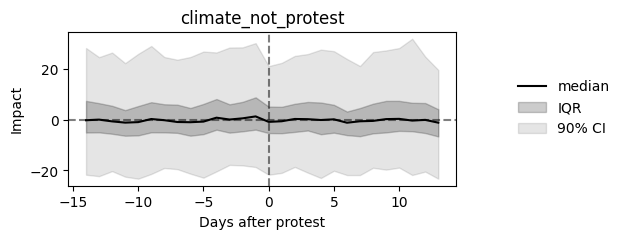

In [73]:
def plot_quantile_ts_comparison(df):
    for i, focus in enumerate(
        ["climate", "climate_and_protest", "climate_not_protest"]
    ):
        df_ = df.copy()
        df_ = df_.query(f"method == 'lasso'")
        df_ = df_.query(f"discourse_type == '{focus}'")
        df_ = df_.melt(
            id_vars=["method"],
            value_vars=[f"impact_day_{str(i+1)}" for i in range(-14, 14)],
            var_name="day",
            value_name="impact",
        )
        plot_quantile_ts_(df_)
        plt.title(focus)
        plt.show()


plot_quantile_ts_comparison(df)

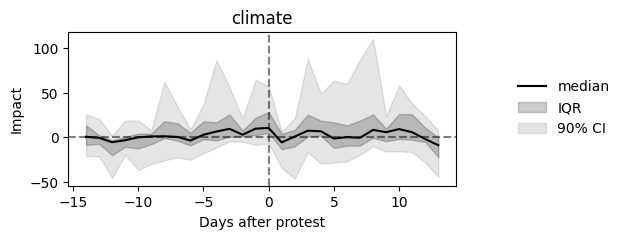

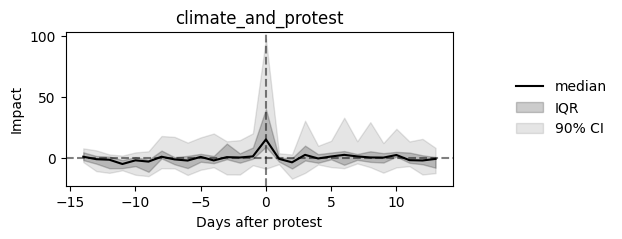

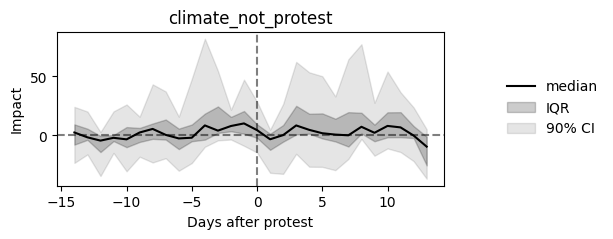

In [75]:
plot_quantile_ts_comparison(df.query("size >= 5000"))

In [77]:
df["assoc_actor_1"].value_counts()

FFF: Fridays for Future; Students (Germany)       2844
Extinction Rebellion                              1452
ALG: Uprising of the Last Generation (Germany)    1092
Ende Gelaende                                      324
Name: assoc_actor_1, dtype: int64

FFF: Fridays for Future; Students (Germany)


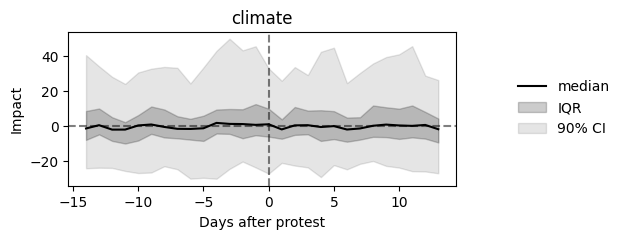

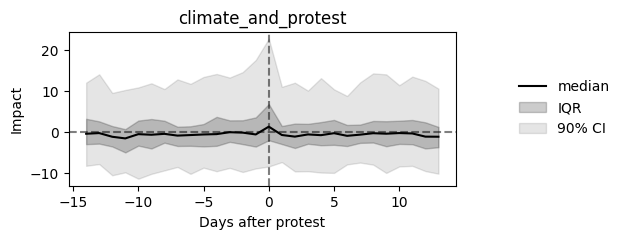

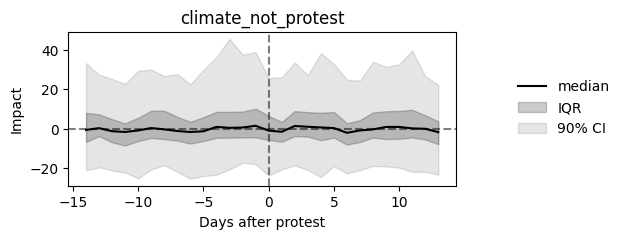

Extinction Rebellion


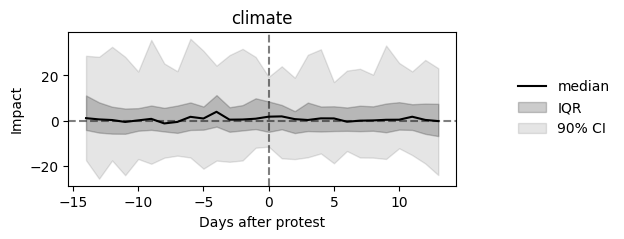

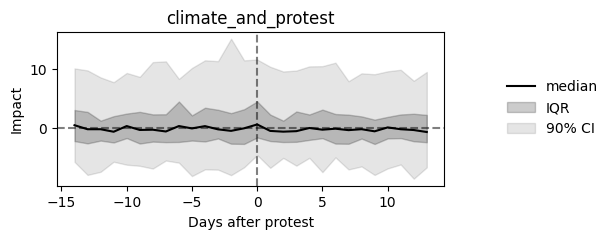

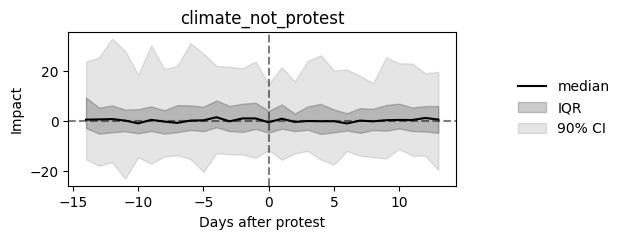

ALG: Uprising of the Last Generation (Germany)


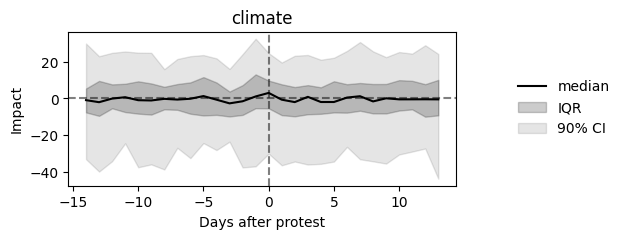

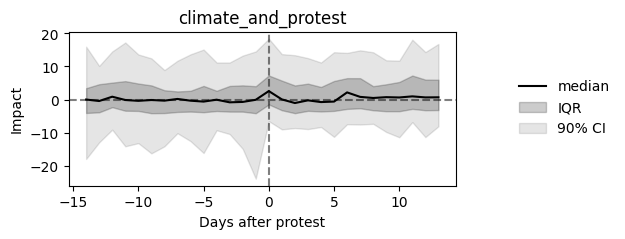

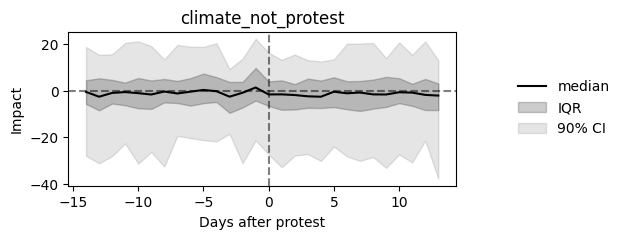

In [78]:
movements = [
    "FFF: Fridays for Future; Students (Germany)",
    "Extinction Rebellion",
    "ALG: Uprising of the Last Generation (Germany)",
]
for m in movements:
    print(m)
    df_ = df.query(f"assoc_actor_1 == '{m}'")
    plot_quantile_ts_comparison(df_)
    plt.show()

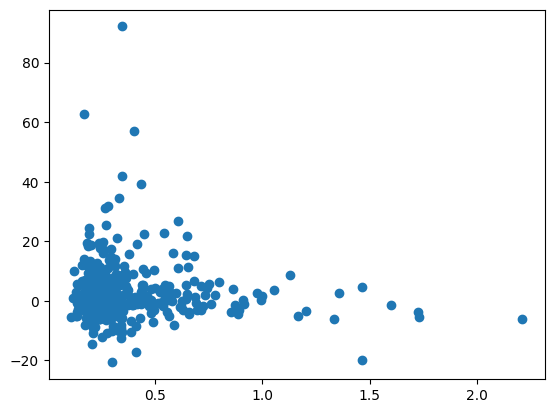

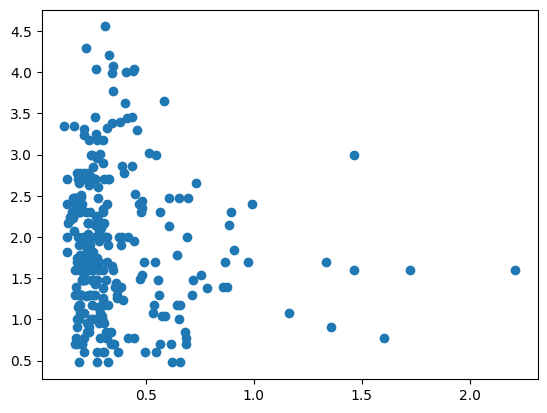

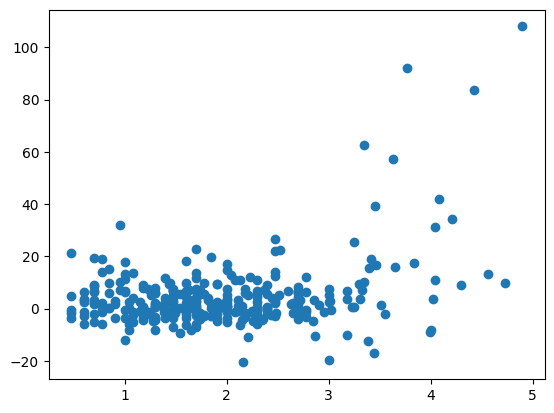

In [90]:
df_ = df.query("method == 'lasso' & discourse_type == 'climate_and_protest'")
plt.scatter(df_["rrmse"], df_["impact_day_1"])
plt.show()
plt.scatter(df_["rrmse"], np.log10(df_["size"]))
plt.show()
plt.scatter(np.log10(df_["size"]), df_["impact_day_1"])
plt.show()

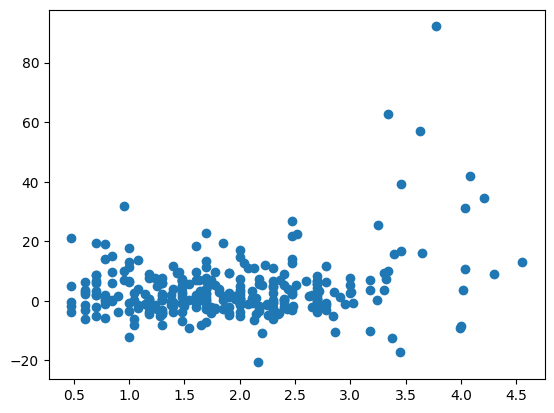

In [93]:
df_ = df.query(
    "method == 'lasso' & discourse_type == 'climate_and_protest' & rrmse < 1"
)
plt.scatter(np.log10(df_["size"]), df_["impact_day_1"])
plt.show()

In [174]:
df_ = df.query(
    "method == 'lasso' & discourse_type == 'climate_and_protest' & rrmse < 1 & impact_day_1 < -15"
)
pd.set_option("display.max_columns", None)
df_

,method,ignore_neighbor_regions,ignore_bw,agg_weekly,normalize,training_interval,start_date,end_date,protest_groups,source,discourse_type,prediction_interval,n_days_protest_free_pre,n_days_protest_free_post,aggregate_protests,event_date,sub_event_type,assoc_actor_1,admin1,location,notes,weekday,region_code,size,n_protests,largest_protest_size,has_mixed_groups,df,seed,n_theoretical_control_regions,method_group,impact_week_1,relative_impact_week_1,impact_week_2,relative_impact_week_2,impact_week_3,relative_impact_week_3,impact_week_4,relative_impact_week_4,impact_day_-13,relative_impact_day_-13,impact_day_-12,relative_impact_day_-12,impact_day_-11,relative_impact_day_-11,impact_day_-10,relative_impact_day_-10,impact_day_-9,relative_impact_day_-9,impact_day_-8,relative_impact_day_-8,impact_day_-7,relative_impact_day_-7,impact_day_-6,relative_impact_day_-6,impact_day_-5,relative_impact_day_-5,impact_day_-4,relative_impact_day_-4,impact_day_-3,relative_impact_day_-3,impact_day_-2,relative_impact_day_-2,impact_day_-1,relative_impact_day_-1,impact_day_0,relative_impact_day_0,impact_day_1,relative_impact_day_1,impact_day_2,relative_impact_day_2,impact_day_3,relative_impact_day_3,impact_day_4,relative_impact_day_4,impact_day_5,relative_impact_day_5,impact_day_6,relative_impact_day_6,impact_day_7,relative_impact_day_7,impact_day_8,relative_impact_day_8,impact_day_9,relative_impact_day_9,impact_day_10,relative_impact_day_10,impact_day_11,relative_impact_day_11,impact_day_12,relative_impact_day_12,impact_day_13,relative_impact_day_13,impact_day_14,relative_impact_day_14,n_control_regions,rrmse,date,start_ts,end_ts,duration,distance__inverse,interpretable,alpha,use_autoregressor,lags,pruned
4755,lasso,True,True,False,standard,168,2020-01-01,2022-12-31,"['fff', 'alg', 'xr', 'eg']",mediacloud,climate_and_protest,28,1,1,True,2020-01-03,Peaceful protest,FFF: Fridays for Future; Students (Germany),Hessen,Frankfurt am Main,"On 3 January 2020, between 140 and 150 FFF act...",Friday,HE,145.0,1,145.0,False,region Hessen Bayern Berlin Brandenburg B...,20230413,7.0,linear_weighted_sum,-28.670392,-0.226339,-12.988968,-0.059860,4.461640,0.023918,-10.690839,-0.079967,14.185214,0.323754,-15.581410,-0.690011,-4.047127,-0.212480,5.982456,0.229939,6.436608,0.210599,-8.801373,-0.494421,6.287272,0.235366,-7.649681,-0.323458,-7.615489,-0.336738,-6.152280,-0.380892,18.339889,0.932848,11.169818,0.705603,-14.686564,-0.746020,-4.096533,-0.254498,-20.673004,-0.673980,-5.389151,-0.473183,-9.957003,-0.768465,-3.722488,-0.236762,-6.560516,-0.373595,8.488116,0.547201,9.143654,0.400049,-13.580348,-0.392719,-3.027814,-0.177816,3.678088,0.134620,5.821443,0.240769,-1.006155,-0.033532,-0.093738,-0.002832,-4.780444,-0.094139,6.0,0.300297,2023-05-14,1.684049e+09,1.684049e+09,0.042920,NaN,True,0.1,False,14.0,NaN
4795,lasso,True,True,False,standard,168,2020-01-01,2022-12-31,"['fff', 'alg', 'xr', 'eg']",mediacloud,climate_and_protest,28,1,1,True,2020-09-25,Peaceful protest,FFF: Fridays for Future; Students (Germany),Hessen,Frankfurt am Main,"On 25 September 2020, around 2,300 Fridays for...",Friday,HE,2800.0,7,2300.0,False,region Hessen Berlin Brandenburg Bremen S...,20230413,5.0,linear_weighted_sum,30.340789,0.156671,3.728967,0.030007,-19.369575,-0.178736,-27.587227,-0.268915,-5.209731,-0.394386,4.681443,0.453692,-7.100905,-0.441025,5.790269,0.438334,0.007921,0.000417,-6.209731,-0.470088,-11.328840,-0.485615,-5.100905,-0.316809,-13.209731,-1.000000,1.790269,0.135527,-16.883253,-0.771515,-7.992079,-0.420811,6.235856,0.530073,7.572617,1.019554,-17.033213,-0.239792,4.225573,0.170562,-9.546492,-0.544068,-11.883253,-0.543030,13.562334,0.663595,27.899095,1.732766,23.116747,1.056367,-7.437666,-0.363920,16.018204,2.677825,0.235856,0.020049,17.888811,0.614500,-14.437666,-0.706424,0.007921,0.000417,-8.546492,-0.487077,2.0,0.410233,2023-05-14,1.684049e+09,1.684049e+09,0.120179,NaN,True,0.1,False,14.0,NaN


In [175]:
df_.iloc[1].to_dict()

{'method': 'lasso',
 'ignore_neighbor_regions': True,
 'ignore_bw': True,
 'agg_weekly': False,
 'normalize': 'standard',
 'training_interval': 168,
 'start_date': '2020-01-01',
 'end_date': '2022-12-31',
 'protest_groups': "['fff', 'alg', 'xr', 'eg']",
 'source': 'mediacloud',
 'discourse_type': 'climate_and_protest',
 'prediction_interval': 28,
 'n_days_protest_free_pre': 1,
 'n_days_protest_free_post': 1,
 'aggregate_protests': True,
 'event_date': '2020-09-25',
 'sub_event_type': 'Peaceful protest',
 'assoc_actor_1': 'FFF: Fridays for Future; Students (Germany)',
 'admin1': 'Hessen',
 'location': 'Frankfurt am Main',
 'notes': 'On 25 September 2020, around 2,300 Fridays for Future activists protested in Frankfurt am Main for more climate action as part of a Global Climate Strike. [size=around 2,300]',
 'weekday': 'Friday',
 'region_code': 'HE',
 'size': 2800.0,
 'n_protests': 7,
 'largest_protest_size': 2300.0,
 'has_mixed_groups': False,
 'df': 'region  Hessen  Berlin  Brandenburg

In [176]:
from protest_impact.data.protests import aggregate_protests, get_climate_protests

protests = get_climate_protests()
protests = aggregate_protests(protests)

In [177]:
p = protests.query("event_date == '2020-09-25'")
p

,event_date,sub_event_type,assoc_actor_1,admin1,location,notes,weekday,region_code,size,n_protests,largest_protest_size,has_mixed_groups
18,2020-09-25,Peaceful protest,FFF: Fridays for Future; Students (Germany),Bayern,Nurnberg,"On 25 September 2020, more than 1,500 Fridays ...",Friday,BY,2850.0,15,1500.0,False
79,2020-09-25,Peaceful protest,FFF: Fridays for Future; Students (Germany),Hamburg,Hamburg,"On 25 September 2020, between 6,000 to 16,000 ...",Friday,HH,11000.0,1,11000.0,False
99,2020-09-25,Peaceful protest,FFF: Fridays for Future; Students (Germany),Hessen,Frankfurt am Main,"On 25 September 2020, around 2,300 Fridays for...",Friday,HE,2800.0,7,2300.0,False
121,2020-09-25,Peaceful protest,FFF: Fridays for Future; Students (Germany),Niedersachsen,Gottingen,"On 25 September 2020, around 2,500 Fridays for...",Friday,NI,4270.0,12,2500.0,False
159,2020-09-25,Peaceful protest,FFF: Fridays for Future; Students (Germany),Nordrhein-Westfalen,Koln,"On 25 September 2020, around 10,000 Fridays fo...",Friday,NW,16320.0,8,10000.0,False
199,2020-09-25,Peaceful protest,FFF: Fridays for Future; Students (Germany),Rheinland-Pfalz,Mainz,"On 25 September 2020, around 1,000 Fridays for...",Friday,RP,1700.0,6,1000.0,False
214,2020-09-25,Peaceful protest,FFF: Fridays for Future; Students (Germany),Sachsen,Dresden,"On 25 September 2020, around 1,000 to 4,000 Fr...",Friday,SN,2500.0,6,2500.0,False
227,2020-09-25,Peaceful protest,FFF: Fridays for Future; Students (Germany),Schleswig-Holstein,Kiel,"On 25 September 2020, between 3,000 and 6,000 ...",Friday,SH,4500.0,2,4500.0,False


In [178]:
from protest_impact.data import german_regions, neighbor_regions

r = [a["code"] for a in german_regions if a["name"] not in p["admin1"].unique()]
print(r)
r = [
    a["code"]
    for a in german_regions
    if a["name"] not in p["admin1"].unique()
    and a["name"] not in neighbor_regions["Hessen"]
]
print(r)

['BW', 'BE', 'BB', 'HB', 'MV', 'SL', 'ST', 'TH']
['BE', 'BB', 'HB', 'MV', 'SL', 'ST']


Quick Google search yields:

- 21000 in BE (according to the organizers)
- (6000 in BW (according to the organizers) (6000 in Stuttgart, 17000 in all of BW))
- 3000 in HB
- (1000 in TH)
- 0 in BB (near to Berlin)
- 0 in MV
- 0 in SL
- 0 in ST

Official police data yields:

- 8000 in BE
- (>= 1 march in BW)
- 6 marches in HB
- (0 in TH)
- 150 in BB
- no data for MV
- no data for SL
- 1 march in ST

In [179]:
from protest_impact.data.protests import get_climate_queries
from protest_impact.synthetic_region import get_regional_counts_for_protest

queries = get_climate_queries()
query = queries["climate_and_protest"]
print(df_.iloc[1].admin1, df_.iloc[1].event_date)
count_df = get_regional_counts_for_protest(
    query_str=query[0],
    query_func=query[1],
    region=df_.iloc[1].admin1,
    event_date=pd.Timestamp(df_.iloc[1].event_date),
    source="mediacloud",
    n_days_train=None,
    n_days_predict=28,
    dereko_entries=None,
)
count_df.head()

Hessen 2020-09-25


region,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
-633,7,3,0,0,1,4,0,4,1,2,0,0,0,0
-632,1,1,0,0,1,0,0,5,0,0,2,0,0,0
-631,1,4,1,0,2,2,7,3,0,0,0,0,1,0
-630,1,2,0,0,0,1,0,1,0,0,2,0,0,0
-629,0,2,0,0,1,1,1,2,0,0,0,0,0,0


In [180]:
count_df = count_df[["Hessen"] + [c for c in count_df.columns if c != "Hessen"]]
count_df_ = count_df[
    [
        "Hessen",
        "Berlin",
        "Brandenburg",
        "Bremen",
        "Saarland",
        "Sachsen-Anhalt",
        "Thüringen",
    ]
]
count_df__ = count_df[
    ["Hessen", "Berlin", "Brandenburg", "Bremen", "Saarland", "Thüringen"]
]
count_df___ = count_df[["Hessen", "Brandenburg", "Saarland", "Sachsen-Anhalt"]]

In [181]:
from protest_impact.synthetic_region.hyperopt import objective

for cdf in [count_df, count_df_, count_df__, count_df___]:
    config = df_.iloc[1].to_dict()
    config["df"] = cdf
    result = objective(config)
    print(result["impact_day_0"])

-25.683436081556295
-17.03321303584572
-17.03321303584572
25.19316139794783


/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


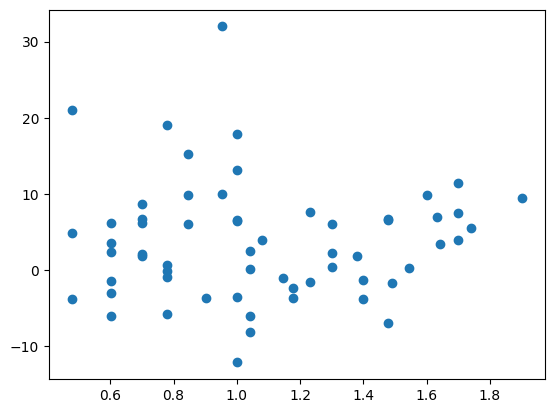

In [182]:
df_ = df.query(
    "method == 'lasso' & discourse_type == 'climate_and_protest' & rrmse < 1 & assoc_actor_1 =='ALG: Uprising of the Last Generation (Germany)'"
)
plt.scatter(np.log10(df_["size"]), df_["impact_day_1"])

In [216]:
df_ = df.query(
    "method == 'lasso' & discourse_type == 'climate_and_protest' & rrmse < 1 & assoc_actor_1 =='ALG: Uprising of the Last Generation (Germany)' & impact_day_1 < -10"
)
df_

,method,ignore_neighbor_regions,ignore_bw,agg_weekly,normalize,training_interval,start_date,end_date,protest_groups,source,discourse_type,prediction_interval,n_days_protest_free_pre,n_days_protest_free_post,aggregate_protests,event_date,sub_event_type,assoc_actor_1,admin1,location,notes,weekday,region_code,size,n_protests,largest_protest_size,has_mixed_groups,df,seed,n_theoretical_control_regions,method_group,impact_week_1,relative_impact_week_1,impact_week_2,relative_impact_week_2,impact_week_3,relative_impact_week_3,impact_week_4,relative_impact_week_4,impact_day_-13,relative_impact_day_-13,impact_day_-12,relative_impact_day_-12,impact_day_-11,relative_impact_day_-11,impact_day_-10,relative_impact_day_-10,impact_day_-9,relative_impact_day_-9,impact_day_-8,relative_impact_day_-8,impact_day_-7,relative_impact_day_-7,impact_day_-6,relative_impact_day_-6,impact_day_-5,relative_impact_day_-5,impact_day_-4,relative_impact_day_-4,impact_day_-3,relative_impact_day_-3,impact_day_-2,relative_impact_day_-2,impact_day_-1,relative_impact_day_-1,impact_day_0,relative_impact_day_0,impact_day_1,relative_impact_day_1,impact_day_2,relative_impact_day_2,impact_day_3,relative_impact_day_3,impact_day_4,relative_impact_day_4,impact_day_5,relative_impact_day_5,impact_day_6,relative_impact_day_6,impact_day_7,relative_impact_day_7,impact_day_8,relative_impact_day_8,impact_day_9,relative_impact_day_9,impact_day_10,relative_impact_day_10,impact_day_11,relative_impact_day_11,impact_day_12,relative_impact_day_12,impact_day_13,relative_impact_day_13,impact_day_14,relative_impact_day_14,n_control_regions,rrmse,date,start_ts,end_ts,duration,distance__inverse,interpretable,alpha,use_autoregressor,lags,pruned
4103,lasso,True,True,False,standard,168,2020-01-01,2022-12-31,"['fff', 'alg', 'xr', 'eg']",mediacloud,climate_and_protest,28,1,1,True,2022-12-20,Protest with intervention,ALG: Uprising of the Last Generation (Germany),Bayern,Munchen,"On 20 December 2022, at least 10 members of AL...",Tuesday,BY,10.0,1,10.0,False,region Bayern Brandenburg Bremen Hamburg ...,20230413,10.0,linear_weighted_sum,-54.616496,-0.277782,-33.168787,-0.131015,-256.610794,-0.502557,-629.549431,-0.480004,-24.643952,-0.369785,-23.267941,-0.537764,-19.818500,-0.485527,-57.980220,-0.682279,-16.130422,-0.236758,-59.762156,-0.722095,-55.007602,-0.443582,-67.702258,-0.374662,-154.112615,-0.568445,-114.297464,-0.523586,-101.826097,-0.482986,-67.553508,-0.480625,-57.743886,-0.462900,-66.313603,-0.401138,-12.119934,-0.431009,16.404582,0.594468,-1.719958,-0.109412,-31.344381,-0.676336,-4.961602,-0.146094,-7.161181,-0.443110,-13.714022,-0.477607,-0.701876,-0.032342,-0.288439,-0.009848,13.766245,0.545549,-11.534641,-0.259004,-1.538366,-0.068255,-6.484559,-0.172993,-26.387151,-0.364528,8.0,0.254609,2023-05-14,1.684049e+09,1.684049e+09,0.039348,NaN,True,0.1,False,14.0,NaN
4527,lasso,True,True,False,standard,168,2020-01-01,2022-12-31,"['fff', 'alg', 'xr', 'eg']",mediacloud,climate_and_protest,28,1,1,True,2022-12-16,Peaceful protest,ALG: Uprising of the Last Generation (Germany),Berlin,Berlin - Charlottenburg-Wilmersdorf,"On 16 December 2022, members of ALG demonstrat...",Friday,BE,0.0,1,NaN,False,region Berlin Bayern Brandenburg Bremen H...,20230413,12.0,linear_weighted_sum,-34.005562,-0.320790,-19.251024,-0.182906,-23.798289,-0.159937,-78.045734,-0.243858,2.411008,0.129701,-7.567960,-0.519493,-0.894859,-0.060078,4.369657,0.158147,-8.826371,-0.306191,-10.047718,-0.455726,-3.242045,-0.145762,-3.758423,-0.122192,-8.110729,-0.366823,-4.501104,-0.142887,-0.976381,-0.026406,-10.245384,-0.199928,-31.008150,-0.369109,-19.445562,-0.306492,-10.683715,-0.451100,-7.328697,-0.448823,-1.198403,-0.130284,-2.164642,-0.193884,-3.020646,-0.188547,-3.507165,-0.212463,-6.102294,-0.465742,-5.367766,-0.277149,2.602626,0.169031,-3.812549,-0.322754,-4.184054,-0.317357,-2.807862,-0.167056,-4.052733,-0.269236,-1.628684,-0.119504,9.0,0.210187,2023-05-14,1.684049e+09,1.684049e+09,0.039176,NaN,True,0.1,False,14.0,NaN


In [184]:
p = protests.query("event_date == '2022-12-20'")
p

,event_date,sub_event_type,assoc_actor_1,admin1,location,notes,weekday,region_code,size,n_protests,largest_protest_size,has_mixed_groups


In [185]:
from protest_impact.data import german_regions, neighbor_regions

r = [a["code"] for a in german_regions if a["name"] not in p["admin1"].unique()]
print(r)
r = [
    a["code"]
    for a in german_regions
    if a["name"] not in p["admin1"].unique()
    and a["name"] not in neighbor_regions["Hessen"]
]
print(r)

['BW', 'BY', 'BE', 'BB', 'HB', 'HH', 'HE', 'MV', 'NI', 'NW', 'RP', 'SL', 'SN', 'ST', 'SH', 'TH']
['BE', 'BB', 'HB', 'HH', 'HE', 'MV', 'SL', 'SN', 'ST', 'SH']


2022-12-20 Bayern

simultaneously: BY, BE, BW
end fossil occupy in NI

2022-12-16 Berlin

simultaneously in TH, BE

In [206]:
print(df_.iloc[0].admin1, df_.iloc[0].event_date)
count_df = get_regional_counts_for_protest(
    query_str=query[0],
    query_func=query[1],
    region=df_.iloc[0].admin1,
    event_date=pd.Timestamp(df_.iloc[0].event_date),
    source="mediacloud",
    n_days_train=None,
    n_days_predict=28,
    dereko_entries=None,
)
count_df.tail()

Bayern 2022-12-20


region,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
23,104,44,16,2,37,87,137,310,13,9,31,0,25,3
24,109,66,17,1,55,98,128,317,12,3,28,0,19,0
25,73,38,10,3,25,54,86,266,4,2,19,0,11,3
26,67,33,7,2,25,36,78,211,3,2,16,0,10,6
27,99,36,8,1,33,65,108,264,8,2,25,0,23,0


In [213]:
count_df.index

RangeIndex(start=-1449, stop=28, step=1)

In [210]:
count_df.loc[-5:5]

region,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
-5,59,34,8,0,10,52,33,65,8,3,11,0,4,0
-4,58,13,5,0,9,31,39,50,5,4,10,0,9,0
-3,26,9,1,0,5,20,17,44,3,0,5,0,7,0
-2,9,8,1,0,1,12,2,17,2,1,2,0,1,0
-1,32,9,2,0,2,14,9,43,1,1,1,0,0,0
0,16,13,3,0,8,5,14,35,0,0,2,0,3,0
1,44,13,2,0,7,10,7,47,1,1,2,0,1,0
2,14,7,0,0,6,6,0,14,0,1,1,0,0,0
3,15,14,2,0,10,8,24,34,2,3,7,0,5,0
4,29,18,5,0,6,16,19,34,2,1,4,0,1,3


In [207]:
from protest_impact.data import neighbor_regions

count_df = count_df[["Bayern"] + [c for c in count_df.columns if c != "Bayern"]]
count_df_ = count_df[
    ["Bayern"]
    + [
        c
        for c in count_df.columns
        if c not in ["Bayern", "Sachsen", *neighbor_regions["Bayern"]]
    ]
]
count_df__ = count_df[
    ["Bayern"]
    + [
        c
        for c in count_df.columns
        if c
        not in [
            "Bayern",
            "Sachsen",
            "Berlin",
            "Niedersachsen",
            *neighbor_regions["Bayern"],
        ]
    ]
]

In [217]:
for cdf in [count_df, count_df_, count_df__]:
    config = df_.iloc[0].to_dict()
    config["df"] = cdf
    result = objective(config)
    print(result["impact_day_0"])

-11.205685124510538
-11.320482303037362
-10.85933953152761
